In [1]:
import pickle
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#results_folder = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\monkey\\'
results_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\'

In [36]:
fig_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fig_drafts\\'
save_fig = True

### Load data

In [3]:
csv_data_file_pfdl = results_folder + 'data_pfdl_fixon.csv'
with open(csv_data_file_pfdl, newline='') as f:
    reader = csv.reader(f)
    sua_list_pfdl = list(reader)
    
n_spike_trains_pfdl = len(sua_list_pfdl)
print('N spike_trains in PFdl fixON {}'.format(n_spike_trains_pfdl))

N spike_trains in PFdl fixON 47339


In [4]:
csv_data_file_pfp = results_folder + 'data_pfp_fixon.csv'
with open(csv_data_file_pfp, newline='') as f:
    reader = csv.reader(f)
    sua_list_pfp = list(reader)

n_spike_trains_pfp = len(sua_list_pfp)
print('N spike_trains in PFp fixON {}'.format(n_spike_trains_pfp))

N spike_trains in PFp fixON 43677


### Get spiking data from intervals (fixation here)

In [5]:
def get_spikes_per_interval(sua_list, area_name, interval=None, include_empty_trials=False, verbose=False):
    unit_id_l, trial_id_l, condition_id_l, spike_trains_l = [], [], [], []
    for trial in sua_list:
        if interval is None:
            unit_id_l.append(trial[0])
            trial_id_l.append(trial[1])
            condition_id_l.append(trial[2])
            spike_trains_l.append(trial[3:])
        else:
            spike_train = trial[3:]
            spike_train_interval = [spike for spike in spike_train if int(spike) >=interval[0] and int(spike) <= interval[1]]
            if len(spike_train_interval) >= 1:
                unit_id_l.append(trial[0])
                trial_id_l.append(trial[1])
                condition_id_l.append(trial[2])
                spike_trains_l.append(spike_train_interval)
            else:
                if include_empty_trials:
                    unit_id_l.append(trial[0])
                    trial_id_l.append(trial[1])
                    condition_id_l.append(trial[2])
                    spike_trains_l.append([])
                if verbose:
                    print('Unit {}, trial {}: NO spikes in this interval'.format(trial[0], trial[1]))
    
    summary_df = pd.DataFrame(np.vstack((unit_id_l, trial_id_l, condition_id_l)).T, 
                                             columns=['unit_id', 'trial_id', 'condition_id'])
    summary_df['area'] = area_name
    return summary_df, spike_trains_l

In [6]:
pfdl_1500_no_empty_df, spike_trains_pfdl_1500_no_empty_l = get_spikes_per_interval(sua_list_pfdl, 'pfdl', interval=[0,1500], include_empty_trials=False)
pfp_1500_no_empty_df, spike_trains_pfp_1500_no_empty_l = get_spikes_per_interval(sua_list_pfp, 'pfp', interval=[0,1500], include_empty_trials=False)

In [10]:
pfdl_1500_with_empty_df, spike_trains_pfdl_1500_with_empty_l = get_spikes_per_interval(sua_list_pfdl, 'pfdl', 
                                                                                       interval=[0,1500], include_empty_trials=True)
pfp_1500_with_empty_df, spike_trains_pfp_1500_with_empty_l = get_spikes_per_interval(sua_list_pfp, 'pfp', 
                                                                                     interval=[0,1500], include_empty_trials=True)

### N trials with spikes in fixation period (0 1500)

In [16]:
pfdl_n_trials_per_unit = pfdl_1500_with_empty_df.groupby(by=['unit_id','area'], as_index=False)['trial_id'].count()
pfdl_n_trials_per_unit.rename(columns={'trial_id': 'n_trials_with_empty'}, inplace=True)

pfdl_n_trials_per_unit_fix = pfdl_1500_no_empty_df.groupby(by=['unit_id','area'], as_index=False)['trial_id'].count()
pfdl_n_trials_per_unit_fix.rename(columns={'trial_id': 'n_trials_no_empty'}, inplace=True)

pfdl_n_trials_per_unit_merged = pfdl_n_trials_per_unit.merge(pfdl_n_trials_per_unit_fix, on=['unit_id', 'area'], how='left')
pfdl_n_trials_per_unit_merged

,unit_id,area,n_trials_with_empty,n_trials_no_empty
0,0,pfdl,92,92.0
1,1,pfdl,92,41.0
2,10,pfdl,81,81.0
3,100,pfdl,69,68.0
4,101,pfdl,102,94.0
...,...,...,...,...
539,95,pfdl,85,54.0
540,96,pfdl,106,106.0
541,97,pfdl,93,80.0
542,98,pfdl,77,64.0


In [17]:
pfp_n_trials_per_unit = pfp_1500_with_empty_df.groupby(by=['unit_id','area'], as_index=False)['trial_id'].count()
pfp_n_trials_per_unit.rename(columns={'trial_id': 'n_trials_with_empty'}, inplace=True)

pfp_n_trials_per_unit_fix = pfp_1500_no_empty_df.groupby(by=['unit_id','area'], as_index=False)['trial_id'].count()
pfp_n_trials_per_unit_fix.rename(columns={'trial_id': 'n_trials_no_empty'}, inplace=True)

pfp_n_trials_per_unit_merged = pfp_n_trials_per_unit.merge(pfp_n_trials_per_unit_fix, on=['unit_id', 'area'], how='left')
pfp_n_trials_per_unit_merged

,unit_id,area,n_trials_with_empty,n_trials_no_empty
0,0,pfp,97,85
1,1,pfp,38,17
2,10,pfp,88,22
3,100,pfp,67,67
4,101,pfp,32,30
...,...,...,...,...
538,95,pfp,119,54
539,96,pfp,118,22
540,97,pfp,95,94
541,98,pfp,37,18


In [23]:
n_units_pfdl_pos_trials = len(pfdl_n_trials_per_unit_merged.query('n_trials_no_empty > 0'))
print(n_units_pfdl_pos_trials)

n_units_pfp_pos_trials = len(pfp_n_trials_per_unit_merged.query('n_trials_no_empty > 0'))
print(n_units_pfp_pos_trials)

all_areas_n_units_df = pd.DataFrame(np.vstack((['pfdl', 'pfp'], [n_units_pfp_pos_trials, n_units_pfp_pos_trials])).T, 
                                   columns=['area', 'n_units'])
all_areas_n_units_df['n_units'] = all_areas_n_units_df['n_units'].astype(int)

543
543


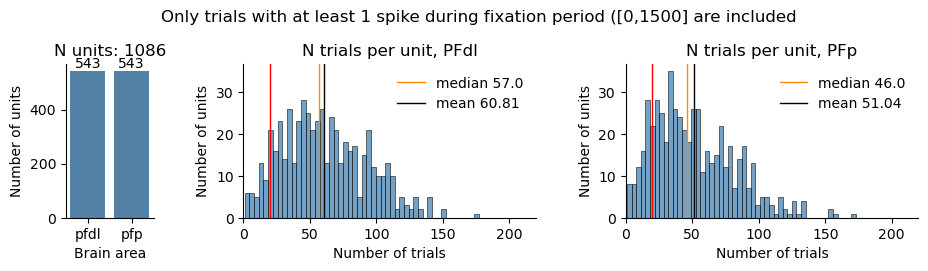

In [37]:
# plot
fig, axes = plt.subplots(1, 3, figsize=(11,2), gridspec_kw={'width_ratios': [0.6, 2, 2]})
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.barplot(ax=axes[0], x='area', y='n_units', data=all_areas_n_units_df, color='steelblue')
axes[0].bar_label(axes[0].containers[0], fmt='%.0f')
axes[0].set_xlabel('Brain area')
axes[0].set_ylabel('Number of units')

sns.histplot(ax=axes[1], x='n_trials_no_empty', data=pfdl_n_trials_per_unit_merged, bins=50, stat='count', color='steelblue')
sns.histplot(ax=axes[2], x='n_trials_no_empty', data=pfp_n_trials_per_unit_merged, bins=50, stat='count', color='steelblue')

axes[1].sharey(axes[2])

axes[0].set_title('N units: {}'.format(n_units_pfp_pos_trials + n_units_pfp_pos_trials))
axes[1].set_title('N trials per unit, PFdl')
axes[2].set_title('N trials per unit, PFp')

axes[1].axvline(x=np.nanmedian(pfdl_n_trials_per_unit_merged['n_trials_no_empty'].values), lw=1, color='darkorange', 
                label='median ' + str(np.round(np.nanmedian(pfdl_n_trials_per_unit_merged['n_trials_no_empty'].values), 2)))
axes[2].axvline(x=np.nanmedian(pfp_n_trials_per_unit_merged['n_trials_no_empty'].values), lw=1, color='darkorange', 
                label='median ' + str(np.round(np.nanmedian(pfp_n_trials_per_unit_merged['n_trials_no_empty'].values), 2)))

axes[1].axvline(x=np.nanmean(pfdl_n_trials_per_unit_merged['n_trials_no_empty'].values), lw=1, color='black', label='mean ' 
                + str(np.round(np.nanmean(pfdl_n_trials_per_unit_merged['n_trials_no_empty'].values), 2)))
axes[2].axvline(x=np.nanmean(pfp_n_trials_per_unit_merged['n_trials_no_empty'].values), lw=1, color='black', label='mean ' 
                + str(np.round(np.nanmean(pfp_n_trials_per_unit_merged['n_trials_no_empty'].values), 2)))

for ax in axes.flat[1:]:
    ax.set_xlabel('Number of trials')
    ax.set_ylabel('Number of units')
    ax.axvline(x=20, lw=1, color='red')
    ax.set_xlim([0, 220])
    ax.legend(frameon=False)

fig.suptitle('Only trials with at least 1 spike during fixation period ([0,1500] are included', y=1.15)

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'dataset_unit_trials_count_non_zero_fixation.png' , bbox_inches='tight')
    plt.savefig(fig_folder + 'dataset_unit_trials_count_non_zero_fixation.svg' , bbox_inches='tight')

In [18]:
pfdl_n_trials_per_unit_merged.to_pickle(results_folder + 'pfdl_n_trials_per_unit_fixation.pkl')
pfp_n_trials_per_unit_merged.to_pickle(results_folder + 'pfp_n_trials_per_unit_merged_fixation.pkl')

### Write filtered spikes to csv

In [7]:
def write_csv(output_filename, unit_id_l, trial_id_l, condition_id_l, spike_trains_l, verbose=True):
    with open(output_filename, 'a', newline='') as f:
        writer = csv.writer(f)
        for unit_row_n, spike_train in enumerate(spike_trains_l):
            if verbose:
                print('Writing unit {}'.format(unit_id_l[unit_row_n]))
                # print(spike_train)
            #spikes_l = spike_train.tolist()
            row = [unit_id_l[unit_row_n]] + [trial_id_l[unit_row_n]] + [condition_id_l[unit_row_n]] + spike_train
            writer.writerow(row)

In [9]:
output_filename_pfdl = results_folder + 'data_pfdl_fixon_1500ms_no_empty_fixation.csv'
write_csv(output_filename_pfdl, pfdl_1500_no_empty_df['unit_id'].values, 
          pfdl_1500_no_empty_df['trial_id'].values, pfdl_1500_no_empty_df['condition_id'].values, 
          spike_trains_pfdl_1500_no_empty_l, verbose=False)

In [11]:
output_filename_pfdl = results_folder + 'data_pfdl_fixon_1500ms_with_empty_fixation.csv'
write_csv(output_filename_pfdl, pfdl_1500_with_empty_df['unit_id'].values, 
          pfdl_1500_with_empty_df['trial_id'].values, pfdl_1500_with_empty_df['condition_id'].values, 
          spike_trains_pfdl_1500_with_empty_l, verbose=False)

In [12]:
output_filename_pfp = results_folder + 'data_pfp_fixon_1500ms_no_empty_fixation.csv'
write_csv(output_filename_pfp, pfp_1500_no_empty_df['unit_id'].values, 
          pfp_1500_no_empty_df['trial_id'].values, pfp_1500_no_empty_df['condition_id'].values, 
          spike_trains_pfp_1500_no_empty_l, verbose=False)

In [13]:
output_filename_pfp = results_folder + 'data_pfp_fixon_1500ms_with_empty_fixation.csv'
write_csv(output_filename_pfp, pfp_1500_with_empty_df['unit_id'].values, 
          pfp_1500_with_empty_df['trial_id'].values, pfp_1500_with_empty_df['condition_id'].values, 
          spike_trains_pfp_1500_with_empty_l, verbose=False)